In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [5]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

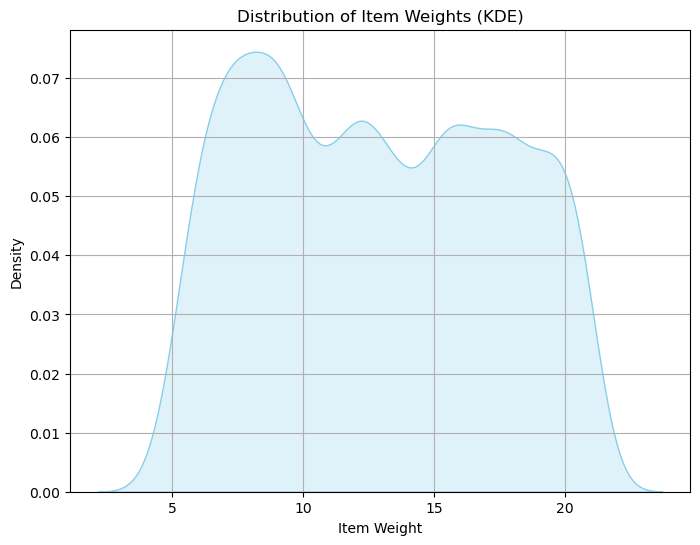

In [6]:
plt.figure(figsize=(8, 6))
sns.kdeplot(train_data['Item_Weight'].dropna(), fill=True, color='skyblue')
plt.title('Distribution of Item Weights (KDE)')
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [7]:
# Assuming 'Item_Type' is the column to use for grouping
# Replace missing values with group-specific mean or median
train_data['Item_Weight'] = train_data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [8]:
#'Outlet_Location_Type' == Tier 3 'Outlet_Type' == Grocery Store is set to unknown as we don't have any values in it
train_data['Outlet_Size'] = train_data.groupby(['Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

In [9]:
# Assuming train_data is your DataFrame
train_data['Item_Visibility'] = train_data.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x: x.replace(0, x.mean()))

In [10]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.069670,140.992782,1997.831867,2181.288914
std,4.232804,0.049810,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.031114,93.826500,1987.000000,834.247400
50%,12.867061,0.056922,143.012800,1999.000000,1794.331000
75%,16.000000,0.097160,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


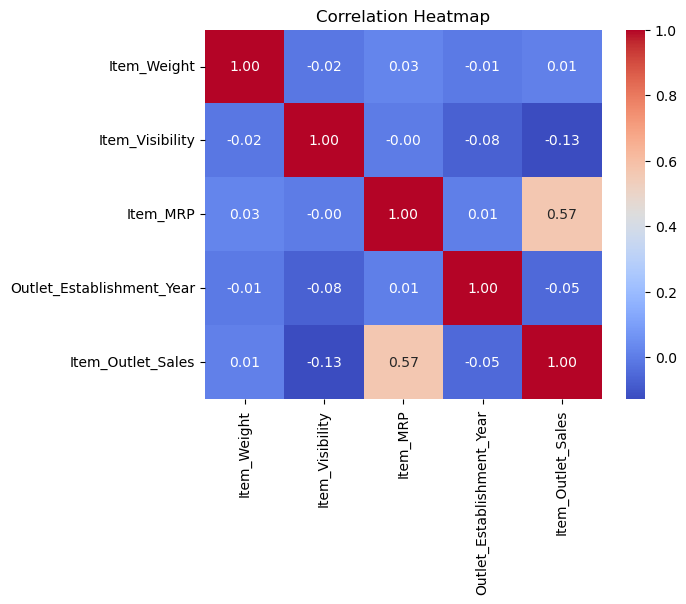

In [12]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

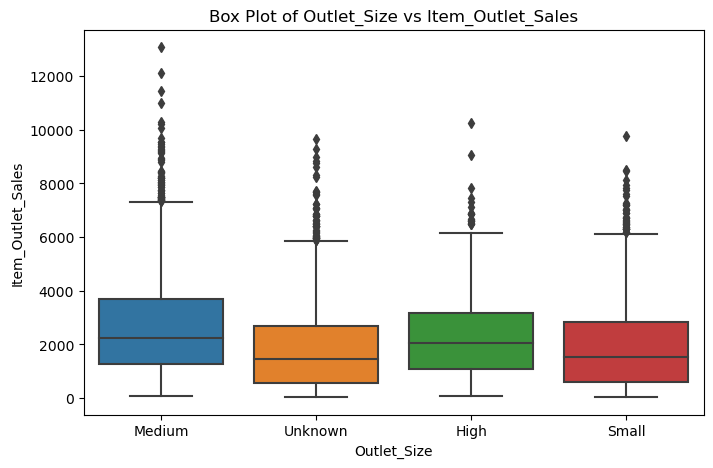

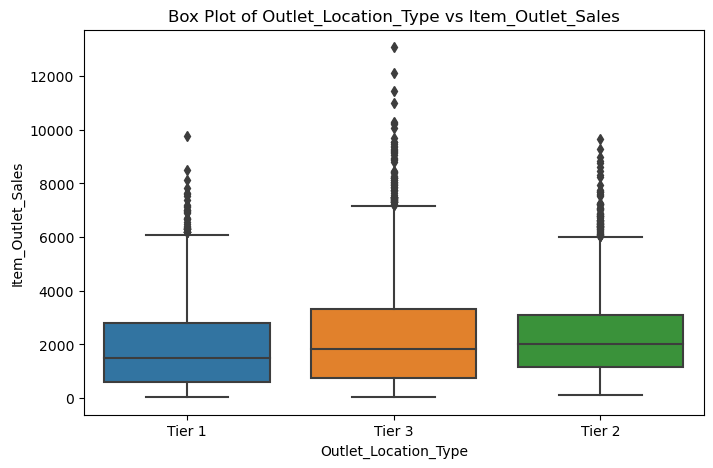

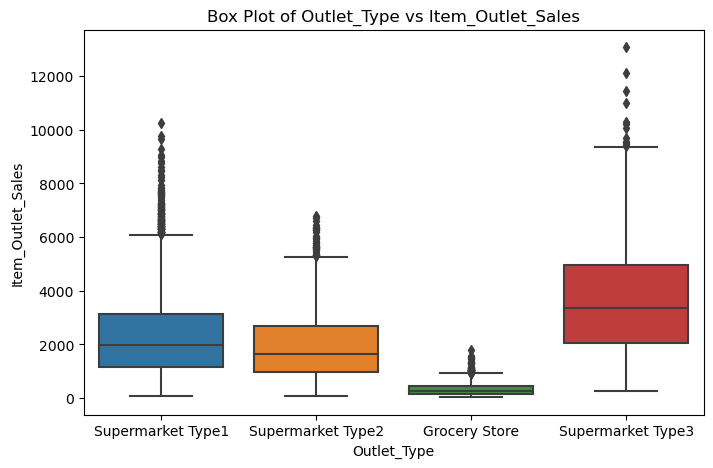

In [13]:
categorical_features = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y='Item_Outlet_Sales', data=train_data)
    plt.title(f'Box Plot of {feature} vs Item_Outlet_Sales')
    plt.show()

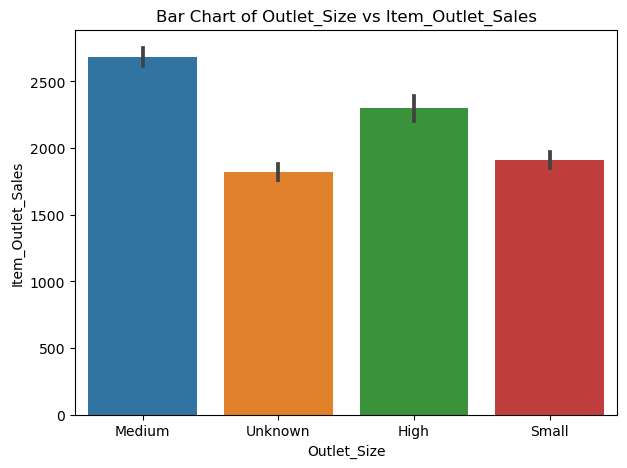

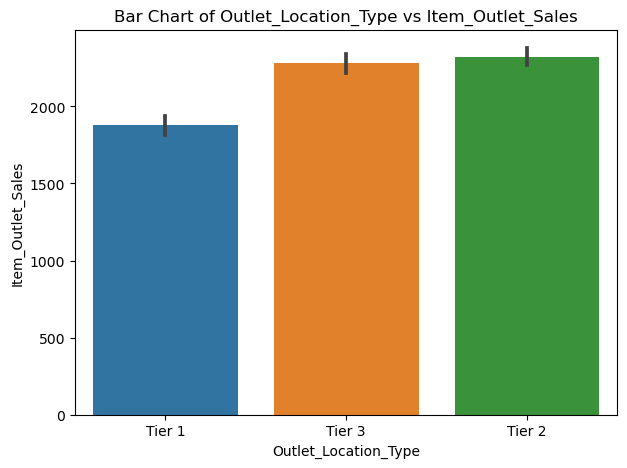

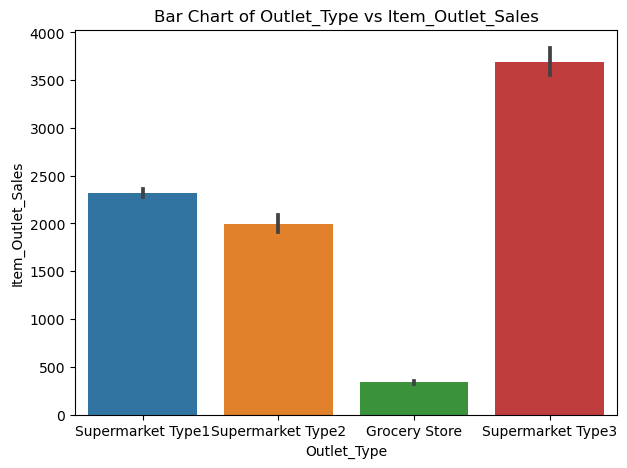

In [14]:
for feature in categorical_features:
    plt.figure(figsize=(7, 5))
    sns.barplot(x=feature, y='Item_Outlet_Sales', data=train_data)
    plt.title(f'Bar Chart of {feature} vs Item_Outlet_Sales')
    plt.show()

Supermarket 3 has only Outlet_Size as Medium and Outlet_Location_Type as Tier 3

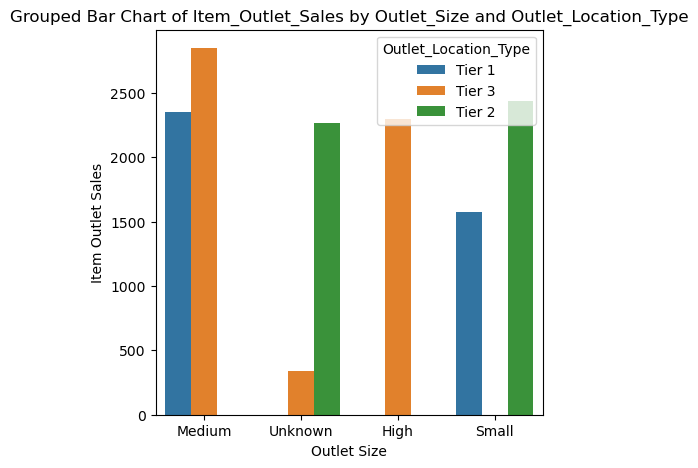

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=train_data, ci=None)
plt.title('Grouped Bar Chart of Item_Outlet_Sales by Outlet_Size and Outlet_Location_Type')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

In [16]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'Low Fat': 1, 'low fat': 1, 'LF': 1, 'Regular': 2, 'reg': 2  })
train_data['Outlet_Size'] = train_data['Outlet_Size'].replace({'Unknown': 0, 'Small': 1, 'Medium': 2, 'High': 3 })
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3 })
train_data['Outlet_Type'] = train_data['Outlet_Type'].replace({'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3 })

In [17]:
# Convert data types
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].astype(int)
train_data['Outlet_Size'] = train_data['Outlet_Size'].astype(int)
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].astype(int)

In [18]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,2,1,1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,2,1,1,2097.2700
3,FDX07,19.20,2,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,0,3,0,732.3800
4,NCD19,8.93,1,0.008082,Household,53.8614,OUT013,1987,3,3,1,994.7052


In [19]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [22]:
# Assuming df is your DataFrame
label_encoder = LabelEncoder()

# Fit and transform the 'Item_Identifier' column
train_data['Item_Identifier'] = label_encoder.fit_transform(train_data['Item_Identifier'])

# Fit and transform the 'Outlet_Identifier' column
train_data['Outlet_Identifier'] = label_encoder.fit_transform(train_data['Outlet_Identifier'])

# Fit and transform the 'Outlet_Identifier' column
train_data['Item_Type'] = label_encoder.fit_transform(train_data['Item_Type'])

In [23]:
train_data.to_csv('train_data.csv', index=False)